# Learn VGG19 architecture from scratch

This is my first model (VGG19 architecture) in Pytorch.

The link of the paper is : https://arxiv.org/pdf/1409.1556.pdf

So we get the following picture of the architecture :

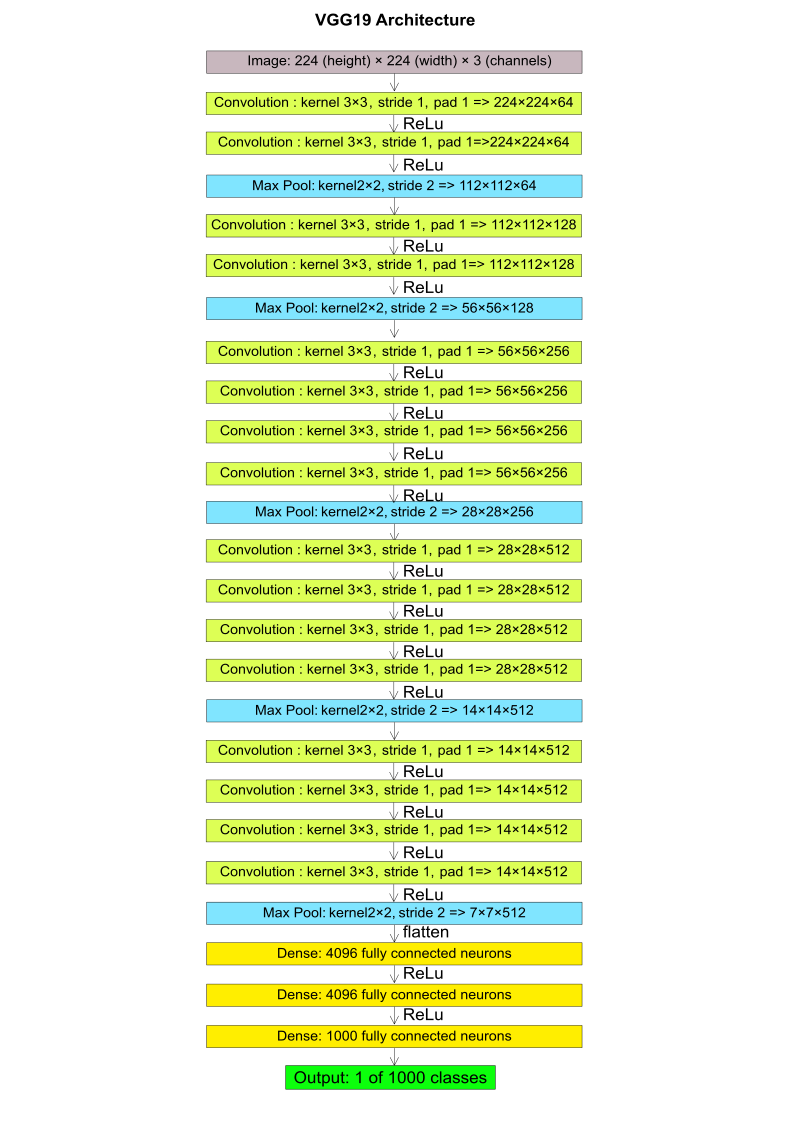

# With Pytorch

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.10.0


In [3]:
class VGG19(nn.Module):
    def __init__(self):
 
        super(VGG19 , self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3 , out_channels= 64 , kernel_size=(3,3) , stride=(1,1) , padding=(1,1))
        self.conv2 = nn.Conv2d(in_channels=64 , out_channels= 64 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv3 = nn.Conv2d(in_channels=64 , out_channels= 128 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv4 = nn.Conv2d(in_channels=128 , out_channels= 128 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv5 = nn.Conv2d(in_channels=128 , out_channels= 256 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv6 = nn.Conv2d(in_channels=256 , out_channels= 256 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.conv7 = nn.Conv2d(in_channels=256 , out_channels= 512 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))
        self.conv8 = nn.Conv2d(in_channels=512 , out_channels= 512 , kernel_size=(3,3) , stride=(1,1), padding=(1,1))

        self.maxPool = nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2))

        self.fc1 = nn.Linear(in_features=25088 , out_features=4096)
        self.fc2 = nn.Linear(in_features=4096 , out_features=4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=1000)

        self.relu = nn.ReLU(inplace = True)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu(x)
      
        x = self.conv2(x)
        x = self.relu(x)

        x = self.maxPool(x)
        
        x = self.conv3(x)
        x = self.relu(x)

        x = self.conv4(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv5(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)

        x = self.conv6(x)
        x = self.relu(x)
        
        x = self.conv6(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv7(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)
        
        x = self.conv8(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)

        x = self.conv8(x)
        x = self.relu(x)
        
        x = self.conv8(x)
        x = self.relu(x)

        x = self.maxPool(x)

        x = x.reshape(x.shape[0] , -1)

        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.softmax(x)

        return x

In [4]:
dev = torch.device("cuda") 

model_1 = VGG19().to(dev)
print(summary(model_1,(3,224,224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

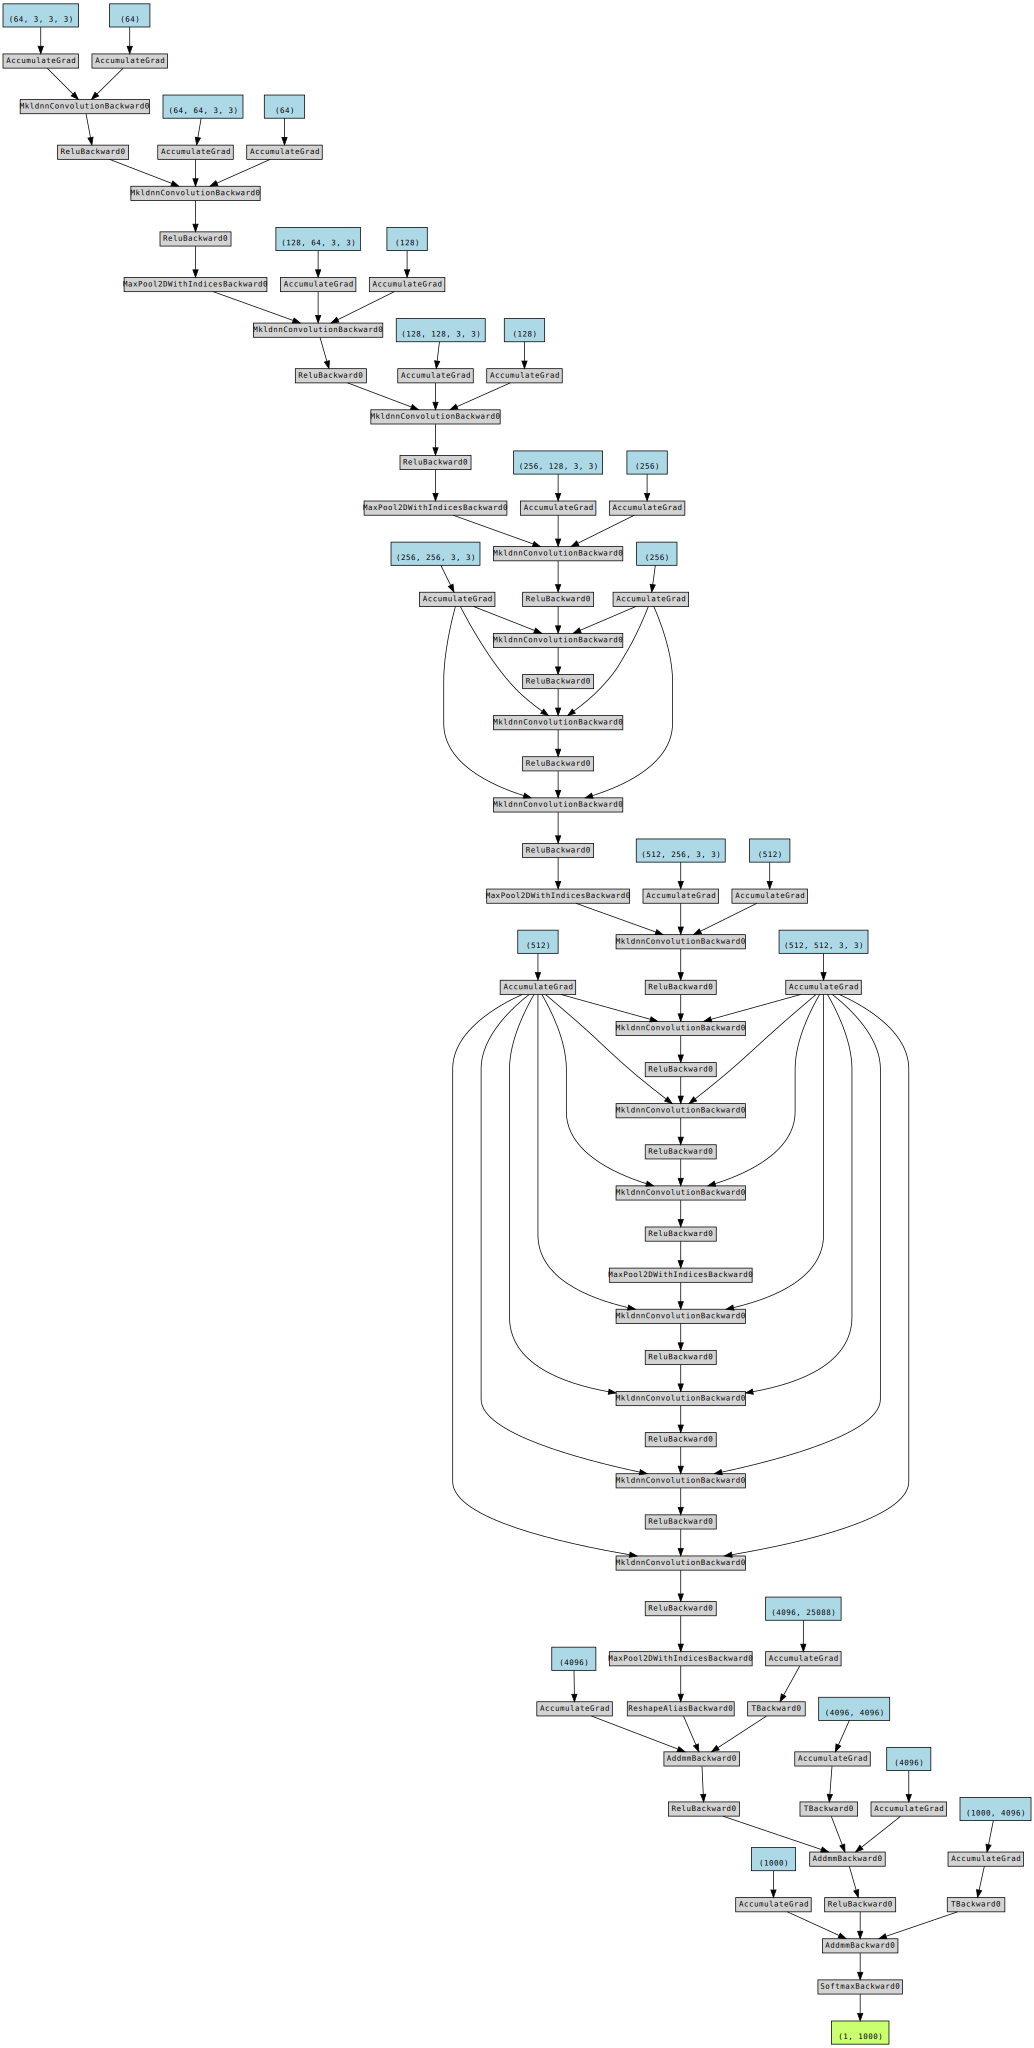

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 224, 224)

model_1_cpu = VGG19()
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

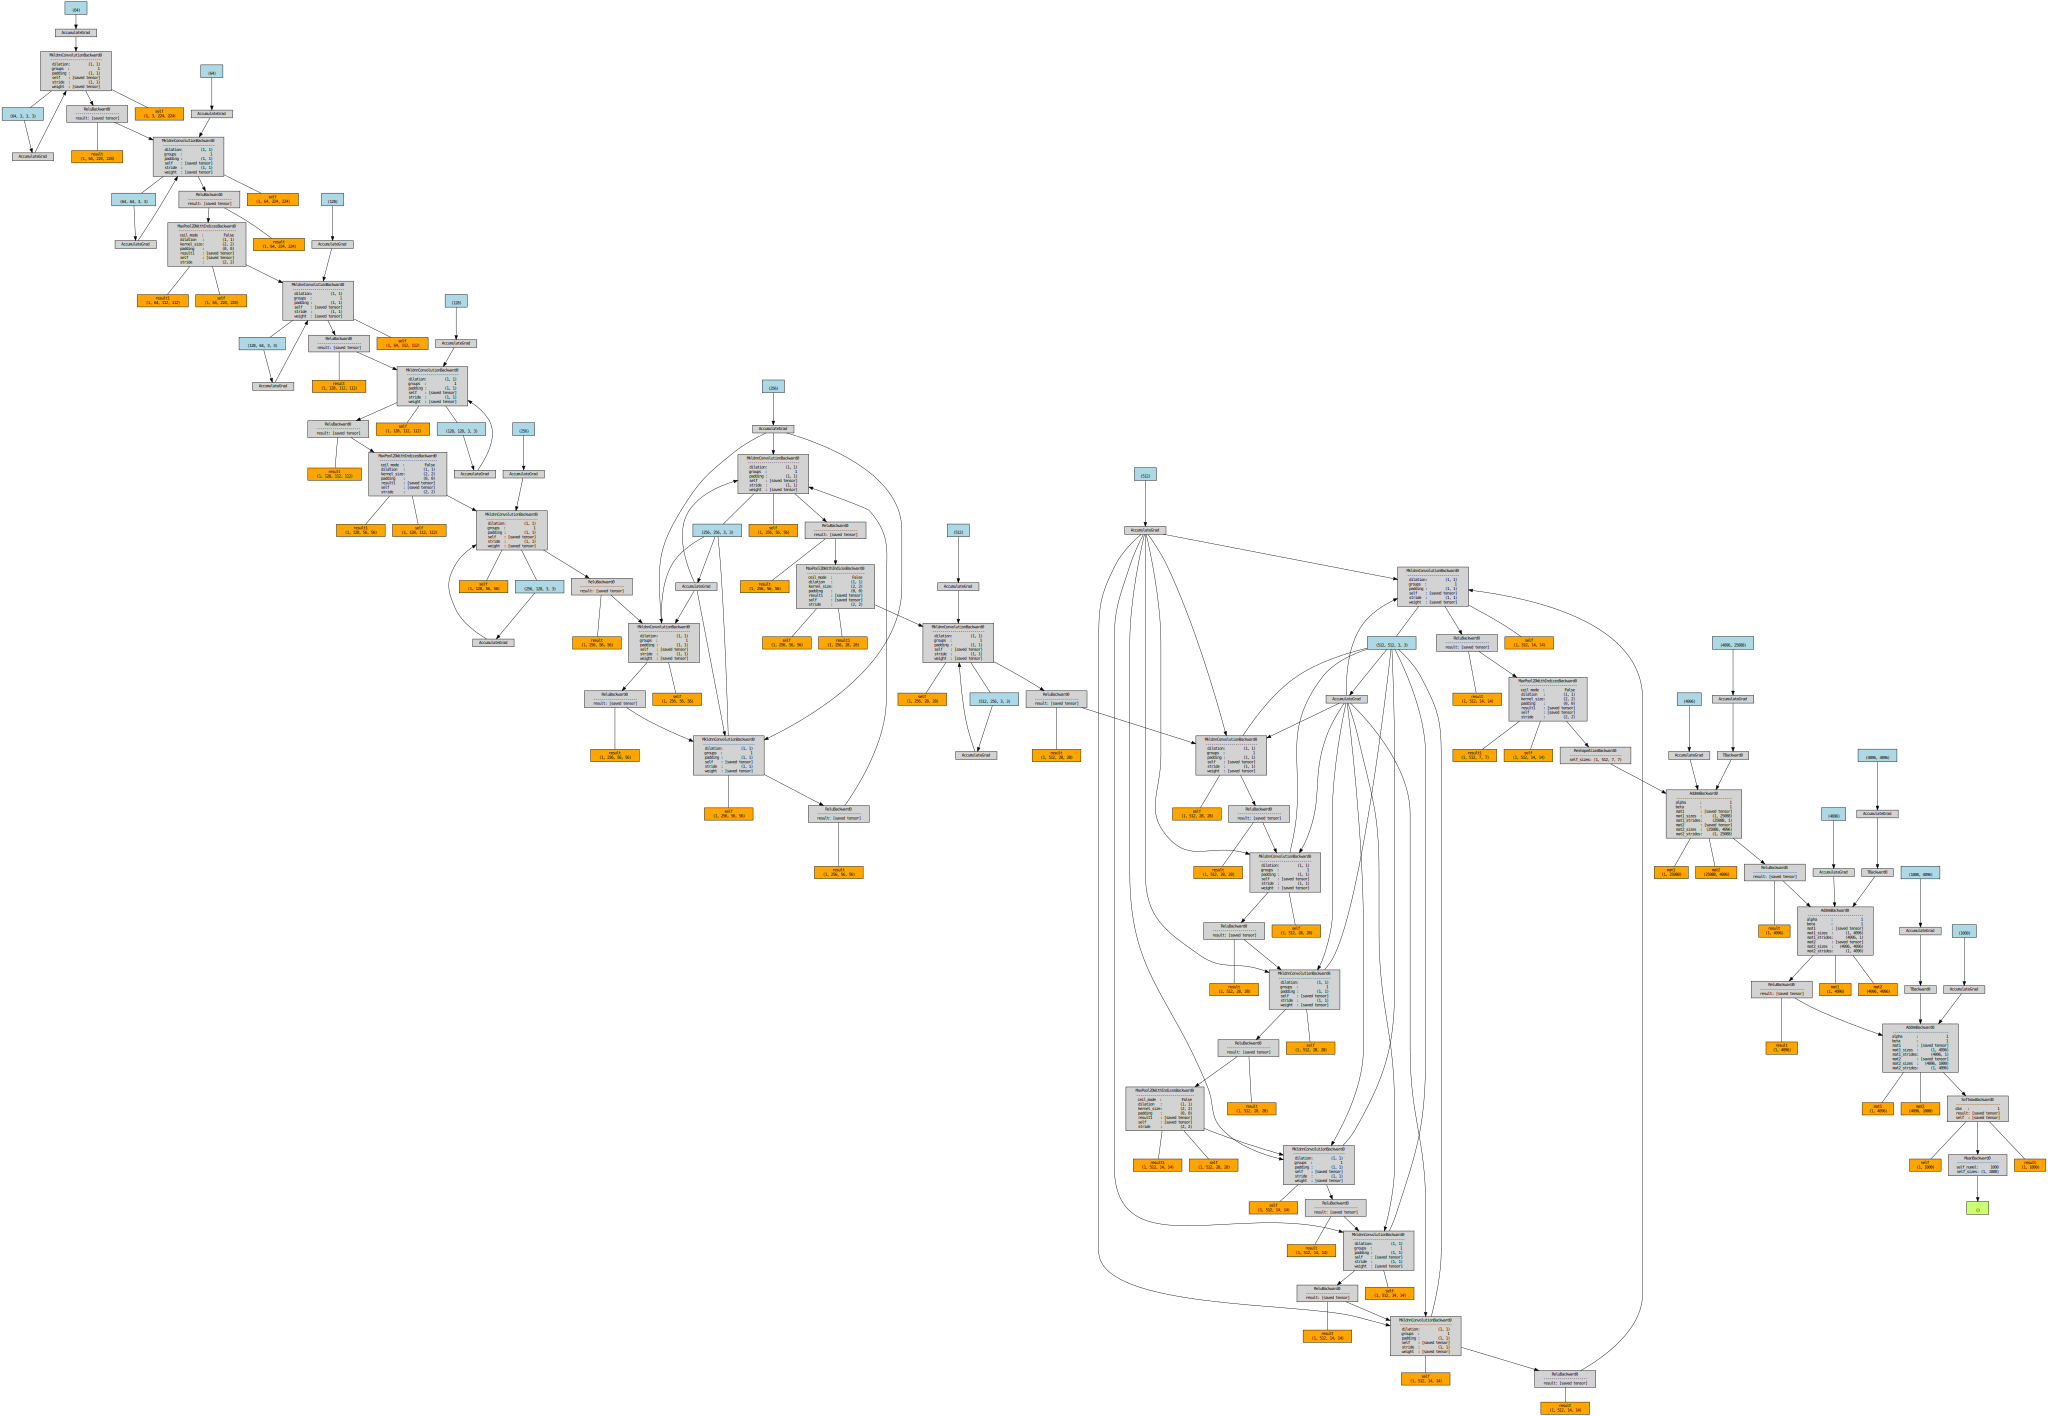

In [6]:
make_dot(model_1_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)